In [569]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

<h2>Dataset

In [570]:
import numpy as np
import pandas as pd

np.random.seed(42)  # for reproducibility

# generate random ages between 18 and 70
age = np.random.randint(18, 61, size=100)

# probability of buying insurance increases with age
bought_insurance = [
    1 if a > 45 and np.random.rand() > 0.2 else 0
    for a in age
]

# create dataframe
df = pd.DataFrame({
    "age": age,
    "bought_insurance": bought_insurance
})

print(df.head())

# save to CSV
df.to_csv("insurance_data.csv", index=False)


   age  bought_insurance
0   56                 1
1   46                 1
2   32                 0
3   60                 1
4   25                 0


In [571]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   age               100 non-null    int32
 1   bought_insurance  100 non-null    int64
dtypes: int32(1), int64(1)
memory usage: 1.3 KB


In [572]:
df.head()

,age,bought_insurance
0,56,1
1,46,1
2,32,0
3,60,1
4,25,0


Text(0, 0.5, 'Bought Insurance')

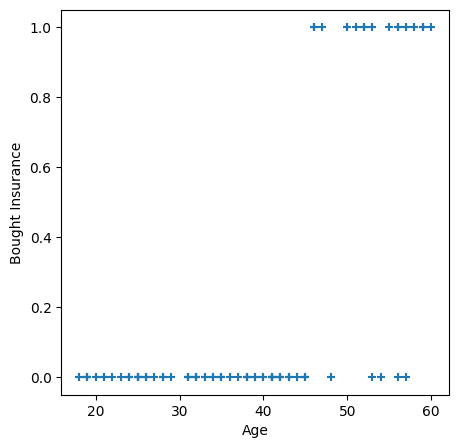

In [573]:
X=df[['age']]
Y=df[['bought_insurance']]
plt.figure(figsize=(5,5))
plt.scatter(X,Y ,marker='+')
plt.xlabel("Age")
plt.ylabel("Bought Insurance")

In [574]:
from sklearn.model_selection import train_test_split
# X_train,X_test,y_train,y_test=train_test_split(X,Y,train_size=0.8)   #Column name is assigned in X and Y
X_train,X_test,y_train,y_test=train_test_split(df[['age']],df[['bought_insurance']],train_size=0.8)

In [575]:
X_test

,age
66,48
45,37
9,28
73,33
47,24
14,41
20,55
17,19
13,57
12,53


In [576]:
model=LogisticRegression()
model.fit(X_train,y_train)

d:\All codes\AI_lab\.venv\Lib\site-packages\sklearn\utils\validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [577]:
y_predict=model.predict(X_train)
y_predict

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

<h4> For probability


In [578]:
model.predict_proba(X_test)

array([[4.73555840e-01, 5.26444160e-01],
       [9.83879364e-01, 1.61206361e-02],
       [9.99480386e-01, 5.19614450e-04],
       [9.96477161e-01, 3.52283933e-03],
       [9.99887839e-01, 1.12161394e-04],
       [9.29422188e-01, 7.05778123e-02],
       [5.78888682e-02, 9.42111132e-01],
       [9.99983504e-01, 1.64955349e-05],
       [2.77500292e-02, 9.72249971e-01],
       [1.16827689e-01, 8.83172311e-01],
       [9.99758568e-01, 2.41431906e-04],
       [8.27004395e-02, 9.17299560e-01],
       [9.88956322e-01, 1.10436777e-02],
       [9.99835440e-01, 1.64560025e-04],
       [7.39677193e-01, 2.60322807e-01],
       [1.62542466e-01, 8.37457534e-01],
       [4.01950169e-02, 9.59804983e-01],
       [9.96477161e-01, 3.52283933e-03],
       [9.76523850e-01, 2.34761505e-02],
       [9.99983504e-01, 1.64955349e-05]])

In [579]:
w=model.coef_[0]
b=model.intercept_[0]

In [580]:
# Simple sigmoid calculation without scaling or predict_proba
w = model.coef_[0]
b = model.intercept_[0]
x = df.age.values
# Calculate sigmoid output manually
z = w * x + b
y_pred = 1 / (1 + np.exp(-z))

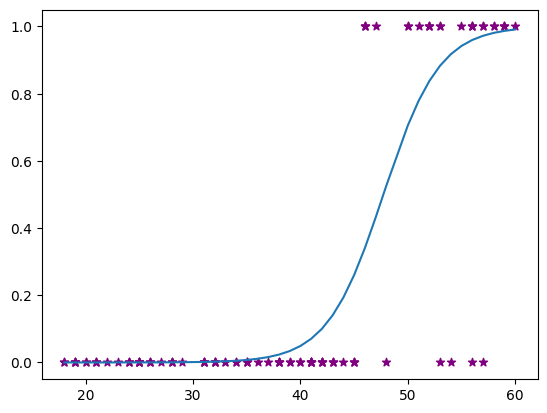

In [581]:
#sort for smooth curve
idx=np.argsort(x)
#actual data
plt.scatter(df.age,df.bought_insurance,marker="*",color='purple')
plt.plot(x[idx],y_pred[idx])

<h3>Confusion Matrix

In [582]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# correct prediction
y_pred_test = model.predict(X_test)

# confusion matrix
cm = confusion_matrix(y_test, y_pred_test)
print(cm)

[[13  3]
 [ 0  4]]


<Axes: >

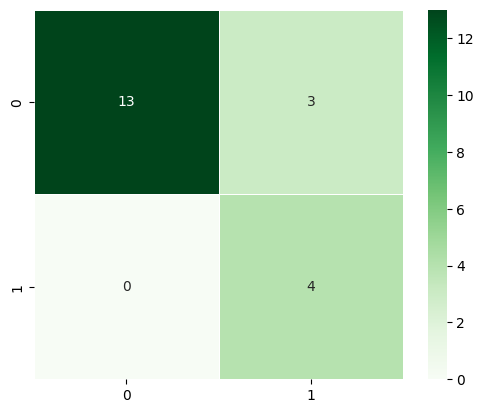

In [583]:
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    linewidths=.5,
    square = True,
    cmap = 'Greens'
)

In [584]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)

In [585]:
print("precision :",precision)
print("\nrecall:",recall)
print("\nf1:",f1)


precision : 0.5714285714285714

recall: 1.0

f1: 0.7272727272727273


In [586]:
from sklearn.metrics import classification_report
report=classification_report(y_test, y_pred_test)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.81      0.90        16
           1       0.57      1.00      0.73         4

    accuracy                           0.85        20
   macro avg       0.79      0.91      0.81        20
weighted avg       0.91      0.85      0.86        20

